In [1]:
!pip install tensorflow numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [2]:
pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.0 MB/s eta 0:00:0000:01:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [8]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()# We Load the CIFAR-10 dataset from Keras

x_train = x_train.astype('float32') / 255.0 # Then, we normalize the image data 
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10) # And convert class vectors to binary class matrices using one-hot encoding
y_test = to_categorical(y_test, 10)

## Initial Model 

In [10]:
model = Sequential([ 
    
    Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')])

In [14]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [16]:
# Training the model
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), verbose=1) 

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 74ms/step - accuracy: 0.4044 - loss: 1.6348 - val_accuracy: 0.6146 - val_loss: 1.0786
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 74ms/step - accuracy: 0.5950 - loss: 1.1349 - val_accuracy: 0.6593 - val_loss: 0.9617
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 74ms/step - accuracy: 0.6562 - loss: 0.9721 - val_accuracy: 0.7012 - val_loss: 0.8540
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.6897 - loss: 0.8776 - val_accuracy: 0.7084 - val_loss: 0.8235
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.7077 - loss: 0.8294 - val_accuracy: 0.7332 - val_loss: 0.7670
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 74ms/step - accuracy: 0.7314 - loss: 0.7752 - val_accuracy: 0.7420 - val_loss: 0.7404
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 74ms/step - accuracy: 0.7363 - loss: 0.7407 - val_accuracy: 0.7438 - val_loss: 0.7475
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 74ms/step - accuracy: 

**Plot The Training Accuracy**

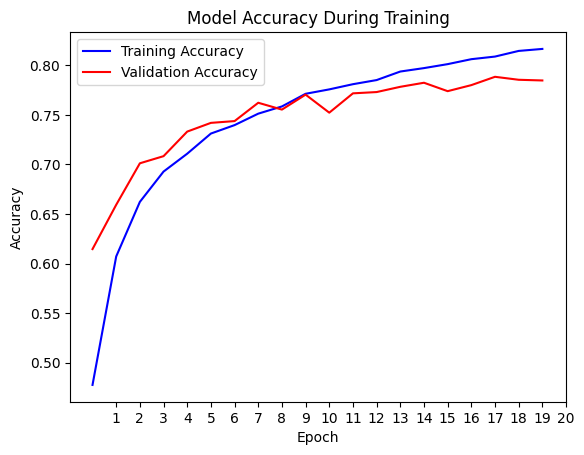

In [23]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color ='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',color ='red' )

plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(range(1, 21))
plt.legend(loc='upper left')
plt.show()

**Result of The Test Accuracy**

In [25]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)# Evaluate the model on the test set
# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7847999930381775


## Model 2: Increase Number of Filters

In [21]:
model1 = Sequential([
    Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')])

# Compile Model 1
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [27]:
# Train Model 1
history = model1.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), verbose=1) 

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 309s 198ms/step - accuracy: 0.8759 - loss: 0.3551 - val_accuracy: 0.7965 - val_loss: 0.6943
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 313s 200ms/step - accuracy: 0.8772 - loss: 0.3555 - val_accuracy: 0.7950 - val_loss: 0.7095
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 304s 194ms/step - accuracy: 0.8811 - loss: 0.3528 - val_accuracy: 0.8006 - val_loss: 0.7010
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 318s 192ms/step - accuracy: 0.8803 - loss: 0.3481 - val_accuracy: 0.7920 - val_loss: 0.7495
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 303s 194ms/step - accuracy: 0.8815 - loss: 0.3493 - val_accuracy: 0.8016 - val_loss: 0.7322
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 311s 199ms/step - accuracy: 0.8810 - loss: 0.3427 - val_accuracy: 0.7925 - val_loss: 0.7130
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 311s 199ms/step - accuracy: 0.8846 - loss: 0.3391 - val_accuracy: 0.7926 - val_loss: 0.7268
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 315s 202ms/step - ac

**Plot The Training Accuracy**

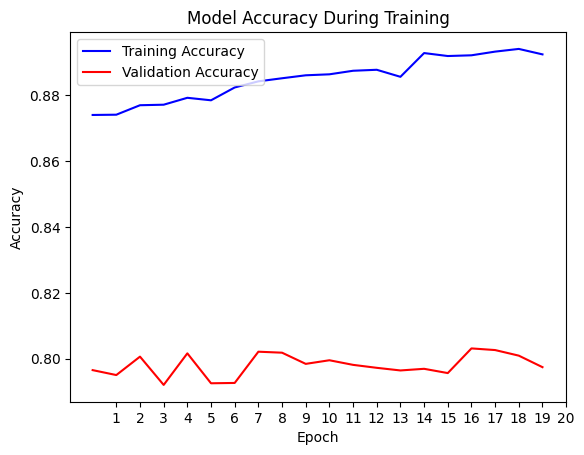

In [29]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color ='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',color ='red' )

plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(range(1,21))
plt.legend(loc='upper left')
plt.show()

**Result of The Test Accuracy**

In [30]:
test_loss, test_accuracy = model1.evaluate(x_test, y_test, verbose=0)# Evaluate the model on the test set
# Print the test accuracy
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7973999977111816


## Model 3: Adjusting Dropout Rates

In [4]:
model2 = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),  # Slightly decreased from 0.25 to 0.2
    
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Increased from 0.25 to 0.3 for a deeper layer

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),  # Decreased from 0.5 to 0.4
    Dense(10, activation='softmax')])

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model2.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 76ms/step - accuracy: 0.3444 - loss: 1.7671 - val_accuracy: 0.5854 - val_loss: 1.1476
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 75ms/step - accuracy: 0.5802 - loss: 1.1759 - val_accuracy: 0.6637 - val_loss: 0.9503
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.6551 - loss: 0.9748 - val_accuracy: 0.7159 - val_loss: 0.8229
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.6961 - loss: 0.8655 - val_accuracy: 0.7354 - val_loss: 0.7575
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 75ms/step - accuracy: 0.7199 - loss: 0.7887 - val_accuracy: 0.7298 - val_loss: 0.7796
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.7399 - loss: 0.7419 - val_accuracy: 0.7558 - val_loss: 0.7086
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 75ms/step - accuracy: 0.7619 - loss: 0.6825 - val_accuracy: 0.7645 - val_loss: 0.6808
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 75ms/step - accuracy: 

**Plot The Training Accuracy**

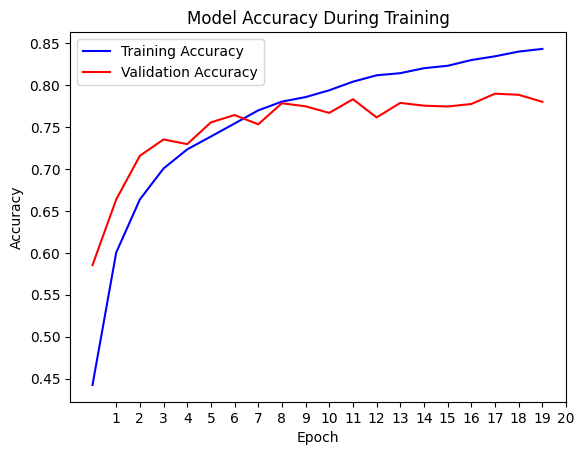

In [5]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color ='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',color ='red' )

plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(range(1,21))
plt.legend(loc='upper left')
plt.show()

**Result of The Test Accuracy**

In [7]:
test_loss, test_accuracy = model2.evaluate(x_test, y_test, verbose=0)# Evaluate the model on the test set
print("Test Accuracy:", test_accuracy)# Print the test accuracy

Test Accuracy: 0.7803000211715698


## Model 4: Change Optimizer Adam -> RMSprop

In [18]:
from tensorflow.keras.optimizers import RMSprop  # Import RMSprop

model3 = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),  # Slightly decreased from 0.25 to 0.2
    
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Increased from 0.25 to 0.3 for a deeper layer

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),  # Decreased from 0.5 to 0.4
    Dense(10, activation='softmax')])

# Compile the model with RMSprop optimizer
model3.compile(loss='categorical_crossentropy', 
               optimizer=RMSprop(learning_rate=0.001),  # Use RMSprop
               metrics=['accuracy'])

# Train the model
history = model3.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 79ms/step - accuracy: 0.3441 - loss: 1.7942 - val_accuracy: 0.5721 - val_loss: 1.1971
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - accuracy: 0.5938 - loss: 1.1550 - val_accuracy: 0.6162 - val_loss: 1.0536
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - accuracy: 0.6639 - loss: 0.9696 - val_accuracy: 0.6298 - val_loss: 1.0752
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 79ms/step - accuracy: 0.6949 - loss: 0.8863 - val_accuracy: 0.7075 - val_loss: 0.8766
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.7141 - loss: 0.8348 - val_accuracy: 0.7146 - val_loss: 0.8292
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 78ms/step - accuracy: 0.7231 - loss: 0.8115 - val_accuracy: 0.7071 - val_loss: 0.8421
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.7283 - loss: 0.8008 - val_accuracy: 0.7257 - val_loss: 0.8262
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 

**Plot The Training Accuracy**

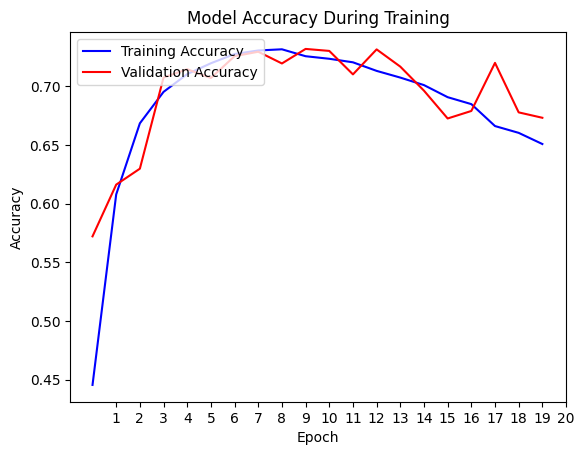

In [19]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color ='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',color ='red' )

plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(range(1,21))
plt.legend(loc='upper left')
plt.show()

**Result of The Test Accuracy**

In [20]:
test_loss, test_accuracy = model3.evaluate(x_test, y_test, verbose=0)# Evaluate the model on the test set
print("Test Accuracy:", test_accuracy)# Print the test accuracy

Test Accuracy: 0.6732000112533569


**We choose Model 2 to infere 10 images**

In [10]:
# We select 10 random images from the test set
indices = np.random.choice(np.arange(len(x_test)), 10, replace=False)
selected_images = x_test[indices]
true_labels = y_test[indices]

predictions = model1.predict(selected_images) # The we predict the classes for the selected images
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(true_labels, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


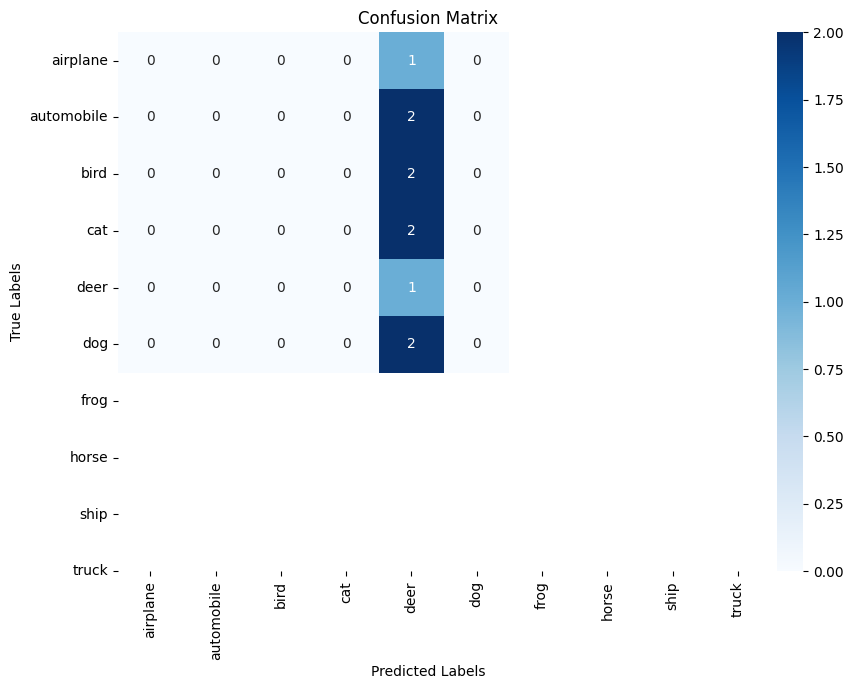

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'true_classes' and 'predicted_classes' from the previous predictions

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()